<a href="https://colab.research.google.com/github/mateo20-bot/Proyectos_/blob/proyecto-VIII/proyecto_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

x= pd.read_csv('https://raw.githubusercontent.com/labeconometria/proyectos/main/economicas.csv')

In [103]:
x

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,ESTU_AGREGADO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,EK202120243329,2001,ANÁLISIS ECONÓMICO,128,2,S,CC,COLOMBIA,M,14/10/1996,...,3.0,71,57,201,95,99,51.049129,2.0,3,PUBLICAR
1,EK202120227314,2001,ANÁLISIS ECONÓMICO,209,4,S,CC,COLOMBIA,M,17/02/2001,...,4.0,100,100,222,99,100,66.866795,4.0,4,PUBLICAR
2,EK202120088295,2001,ANÁLISIS ECONÓMICO,106,1,S,CC,COLOMBIA,M,02/10/1991,...,NaN,1,1,88,1,2,37.751353,1.0,2,PUBLICAR
3,EK202120120119,2001,ANÁLISIS ECONÓMICO,89,1,S,CC,COLOMBIA,F,23/07/1998,...,1.0,12,7,159,49,71,59.846055,4.0,2,PUBLICAR
4,EK202120248108,2001,ANÁLISIS ECONÓMICO,122,1,S,CC,COLOMBIA,M,23/09/1997,...,2.0,20,13,156,44,67,48.248516,2.0,2,PUBLICAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,EK202120232172,2001,ANÁLISIS ECONÓMICO,151,2,S,CC,COLOMBIA,M,18/03/1996,...,3.0,93,87,196,93,98,75.589753,4.0,4,PUBLICAR
3851,EK202120320571,2001,ANÁLISIS ECONÓMICO,162,3,S,CC,COLOMBIA,F,26/07/2000,...,3.0,80,69,192,90,97,75.346915,4.0,4,PUBLICAR
3852,EK202120313923,2001,ANÁLISIS ECONÓMICO,0,1,S,CC,COLOMBIA,F,30/01/1989,...,3.0,71,57,158,47,70,48.890151,2.0,2,PUBLICAR
3853,EK202120281981,2001,ANÁLISIS ECONÓMICO,110,1,S,CC,COLOMBIA,F,23/04/1998,...,1.0,14,9,117,6,15,43.091355,1.0,2,PUBLICAR


In [104]:
x.head()

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,ESTU_AGREGADO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,EK202120243329,2001,ANÁLISIS ECONÓMICO,128,2,S,CC,COLOMBIA,M,14/10/1996,...,3.0,71,57,201,95,99,51.049129,2.0,3,PUBLICAR
1,EK202120227314,2001,ANÁLISIS ECONÓMICO,209,4,S,CC,COLOMBIA,M,17/02/2001,...,4.0,100,100,222,99,100,66.866795,4.0,4,PUBLICAR
2,EK202120088295,2001,ANÁLISIS ECONÓMICO,106,1,S,CC,COLOMBIA,M,02/10/1991,...,NaN,1,1,88,1,2,37.751353,1.0,2,PUBLICAR
3,EK202120120119,2001,ANÁLISIS ECONÓMICO,89,1,S,CC,COLOMBIA,F,23/07/1998,...,1.0,12,7,159,49,71,59.846055,4.0,2,PUBLICAR
4,EK202120248108,2001,ANÁLISIS ECONÓMICO,122,1,S,CC,COLOMBIA,M,23/09/1997,...,2.0,20,13,156,44,67,48.248516,2.0,2,PUBLICAR


In [105]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ESTU_CONSECUTIVO                3855 non-null   object 
 1   RESULT_CODIGOPRUEBA             3855 non-null   int64  
 2   RESULT_NOMBREPRUEBA             3855 non-null   object 
 3   RESULT_PUNTAJE                  3855 non-null   int64  
 4   RESULT_DESEMPENO                3855 non-null   int64  
 5   ESTU_AGREGADO                   3855 non-null   object 
 6   ESTU_TIPODOCUMENTO              3855 non-null   object 
 7   ESTU_NACIONALIDAD               3855 non-null   object 
 8   ESTU_GENERO                     3855 non-null   object 
 9   ESTU_FECHANACIMIENTO            3855 non-null   object 
 10  ESTU_EXTERIOR                   3855 non-null   object 
 11  PERIODO                         3855 non-null   int64  
 12  ESTU_ESTUDIANTE                 38

In [106]:
X=x[['MOD_RAZONA_CUANTITAT_PUNT','MOD_LECTURA_CRITICA_PUNT','MOD_COMPETEN_CIUDADA_PUNT','MOD_INGLES_PUNT','MOD_COMUNI_ESCRITA_PUNT']]

In [107]:
X

,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT
0,207,151,186,300,159
1,201,192,206,210,300
2,101,109,98,132,0
3,146,186,173,187,101
4,158,175,165,163,117
...,...,...,...,...,...
3850,198,193,209,202,180
3851,176,207,208,204,166
3852,143,155,144,189,159
3853,111,94,89,184,108


In [108]:
X

,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT
0,207,151,186,300,159
1,201,192,206,210,300
2,101,109,98,132,0
3,146,186,173,187,101
4,158,175,165,163,117
...,...,...,...,...,...
3850,198,193,209,202,180
3851,176,207,208,204,166
3852,143,155,144,189,159
3853,111,94,89,184,108


In [109]:
X = X.to_numpy()

In [126]:
y=x[['PUNT_GLOBAL']]

In [127]:
Y=y.to_numpy()

In [112]:
#w=Y.T

In [113]:
# estandarizar el dataset
l = []
for i in X.T:
  u = i.mean()
  s = i.std()
  scal = (i - u) / s
  l.append(scal)

x_scal = np.array(l).T

In [114]:
cov_x = np.cov(x_scal.T)
cov_x

array([[1.00025947, 0.67000623, 0.60436332, 0.50943252, 0.36825675],
       [0.67000623, 1.00025947, 0.71551703, 0.52201593, 0.354248  ],
       [0.60436332, 0.71551703, 1.00025947, 0.56419037, 0.32929953],
       [0.50943252, 0.52201593, 0.56419037, 1.00025947, 0.29627643],
       [0.36825675, 0.354248  , 0.32929953, 0.29627643, 1.00025947]])

In [115]:
np.linalg.eig(pd.DataFrame(X).corr().to_numpy())

(array([3.02402535, 0.26753175, 0.39508223, 0.53423896, 0.77912171]),
 array([[-0.47669596, -0.27496516, -0.76305999, -0.33181094, -0.06925372],
        [-0.49725948,  0.7496656 ,  0.20737184, -0.35108616, -0.15642864],
        [-0.48959088, -0.59105618,  0.59222808, -0.12465203, -0.21137913],
        [-0.43090512,  0.11412956, -0.1299644 ,  0.86399816, -0.19470916],
        [-0.31641036, -0.00476231,  0.08432991,  0.06789007,  0.94241244]]))

In [116]:
val_p, vec_p = linalg.eig(cov_x)
val_p, vec_p

(array([3.02481   +0.j, 0.26760117+0.j, 0.39518474+0.j, 0.53437758+0.j,
        0.77932387+0.j]),
 array([[-0.47669596, -0.27496516, -0.76305999, -0.33181094, -0.06925372],
        [-0.49725948,  0.7496656 ,  0.20737184, -0.35108616, -0.15642864],
        [-0.48959088, -0.59105618,  0.59222808, -0.12465203, -0.21137913],
        [-0.43090512,  0.11412956, -0.1299644 ,  0.86399816, -0.19470916],
        [-0.31641036, -0.00476231,  0.08432991,  0.06789007,  0.94241244]]))

In [117]:
val_p = val_p[:2]
vec_p = vec_p[:, :2]

In [118]:
W = vec_p

In [119]:
W

array([[-0.47669596, -0.27496516],
       [-0.49725948,  0.7496656 ],
       [-0.48959088, -0.59105618],
       [-0.43090512,  0.11412956],
       [-0.31641036, -0.00476231]])

In [120]:
pca_p = x_scal @ W

In [121]:
pca_p = pd.DataFrame(pca_p, columns=[f'PC{i}' for i in range(1, pca_p.shape[1] + 1)])

In [122]:
pca_p.head()

,PC1,PC2
0,-2.506149,-0.620121
1,-3.324268,-0.268031
2,4.029056,0.247727
3,-0.199578,0.544644
4,0.056873,0.250281


In [123]:
X

array([[207, 151, 186, 300, 159],
       [201, 192, 206, 210, 300],
       [101, 109,  98, 132,   0],
       ...,
       [143, 155, 144, 189, 159],
       [111,  94,  89, 184, 108],
       [192, 157,  83, 211,  90]])

In [149]:
y=Y.T[0]

In [138]:
y@X

array([102472197, 100870299, 100201580, 108052571,  95172379])

In [150]:
y

array([201, 222,  88, ..., 158, 117, 147])

In [141]:
X

array([[207, 151, 186, 300, 159],
       [201, 192, 206, 210, 300],
       [101, 109,  98, 132,   0],
       ...,
       [143, 155, 144, 189, 159],
       [111,  94,  89, 184, 108],
       [192, 157,  83, 211,  90]])

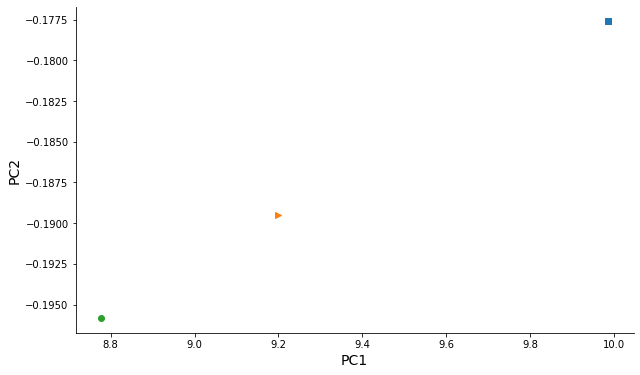

In [151]:
#graficar
fig,ax = plt.subplots(1,1, figsize=(10,6))
markers = ['s','>','o']
for i,j in zip(np.unique(y), markers):
  ax.scatter(pca_p.iloc[:,0][y==i], pca_p.iloc[:,1][y==i], marker=j)

ax.set_xlabel(pca_p.columns[0], size=14)
ax.set_ylabel(pca_p.columns[1], size=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [143]:
scal = StandardScaler()
X_scal = scal.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scal)

pca_2 = pd.DataFrame(X_pca, columns=['PC1','PC2'])

In [144]:
pca3 = PCA()

pca3.fit(X_scal)

PCA()

In [145]:
pca3.explained_variance_

array([3.02481   , 0.77932387, 0.53437758, 0.39518474, 0.26760117])

In [146]:
pca3.explained_variance_ratio_

array([0.60480507, 0.15582434, 0.10684779, 0.07901645, 0.05350635])

In [147]:
np.cumsum(pca3.explained_variance_ratio_)

array([0.60480507, 0.76062941, 0.8674772 , 0.94649365, 1.        ])

ValueError: ignored

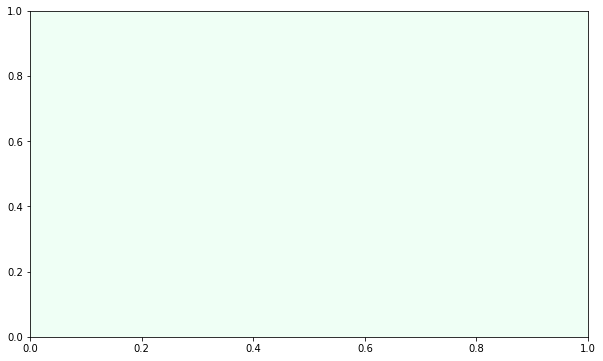

In [152]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.set_facecolor('#EFFFF5')
plt.plot(np.arange(1,5,1), pca3.explained_variance_ratio_, marker='s', label='varianza_explicada')
plt.plot(np.arange(1,5,1),np.cumsum(pca3.explained_variance_ratio_), marker='^', color='darkgreen', label='varianza_acumulada')
plt.xlim(0.8,4.5)
plt.ylim(-0.05,1.05)
plt.xticks(ticks=np.arange(1,5,1))
plt.axhline(1, ls='--', color='g', alpha=0.3)
plt.xlabel('Número de componentes', size=14)
plt.ylabel('% varianza explicada', size=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.grid(alpha=0.2, axis='both')
plt.show()